# Second Project in Pattern Recognition

Όνομα: Ευαγγελόπουλος Βασίλειος, AEM: 9767




In [21]:
# Importing the necessary modules
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# First Part

### Task_1: calculate and present likelihood functions

theta parameter for D1 dataset is equal to: 2.5992599259926
theta parameter for D2 dataset is equal to: -3.1593159315931594


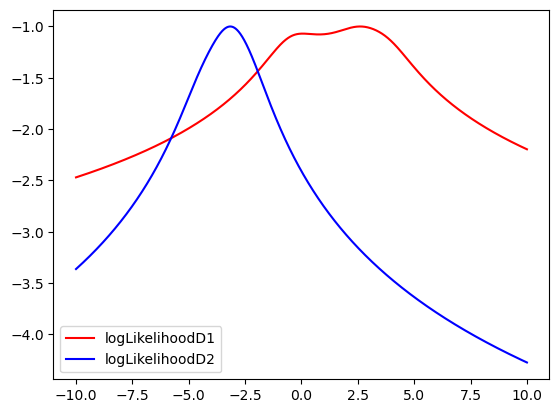

In [22]:
# probability distribution function as a function
def stressPdf(point, theta): 
    return 1 / (math.pi*(1 + (point-theta)**2))

# likelihood function as a function
def likelihood(points, theta):
    probability = 1
    for point in points:
        probability = probability * stressPdf(point, theta)
    return probability

# initialize given data
d1 = [2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1]
d2 = [-4.5, -3.4, -3.1, -3.0, -2.3]

# calculate likelihood
thetaLinePoints = np.linspace(-10, 10, num = 10000)
logLikelihoodD1 = np.zeros(len(thetaLinePoints))
logLikelihoodD2 = np.zeros(len(thetaLinePoints))
for linePointIdx in range(len(thetaLinePoints)):
    logLikelihoodD1[linePointIdx] = math.log(likelihood(d1, thetaLinePoints[linePointIdx]))
    logLikelihoodD2[linePointIdx] = math.log(likelihood(d2, thetaLinePoints[linePointIdx]))

# find theta parameters and print them
thetaD1 = thetaLinePoints[np.argmax(logLikelihoodD1)]
thetaD2 = thetaLinePoints[np.argmax(logLikelihoodD2)]
print("theta parameter for D1 dataset is equal to:", thetaD1)
print("theta parameter for D2 dataset is equal to:", thetaD2)

# plot loglikelihoods normalized on their max values
plt.plot(thetaLinePoints, -logLikelihoodD1/max(logLikelihoodD1), 'r', label="logLikelihoodD1")
plt.plot(thetaLinePoints, -logLikelihoodD2/max(logLikelihoodD2), 'b', label="logLikelihoodD2")
plt.legend()
plt.show()

Comments: Από τα δεδομένα που δόθηκαν για τις δύο κλάσεις, παρατηρούμε ότι, χρησιμοποιώντας τη μέθοδο της μέγιστης πιθανοφάνειας, η παράμετρος θήτα που μεγιστοποιεί τη συνάρτηση είναι ίση με 2.6 για το πρώτο dataset ενώ είναι ίση με -3.15 για το δεύτερο dataset. Ρίχνοντας μία ματιά στα datasets που δόθηκαν, αυτές οι δύο τιμές φαίνονται λογικές. Όσον αφορά την αναπαράσταση των συναρτήσεων, αύτες κανονικοποιήθηκαν με τη μέγιστη τιμή τους, βήμα απαραίτητο για να αναπαρασταθούν μαζί.

### Task_2: create a classifier and partition the data points using it

the thetaParameters that were calculated are: [2.5992599259926, -3.1593159315931594] (as expected)
the values of the g function are equal to:
 [3.895, 0.188, -0.312, 3.678, 0.312, 3.486, 3.141, -2.574, -3.218, -3.171, -3.115, -2.33]


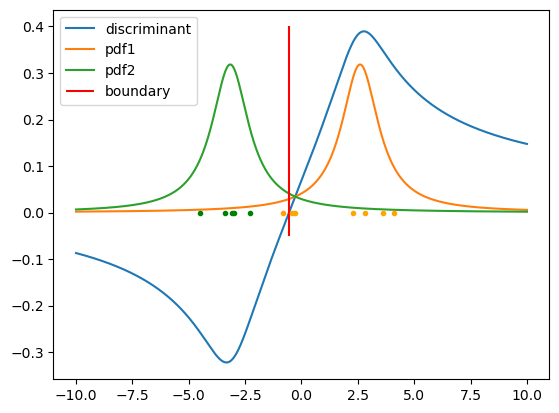

In [23]:
# define classifier class
class Classifier:
    def __init__(self):
        self.theta = []
        
    def fit(self, dataPoints, thetaPoints):
        classes = [point[1] for point in dataPoints]
        classesTotal = len(Counter(classes).keys());
        logLikelihood = np.zeros((classesTotal, len(thetaPoints)))
        for classIdx in range(classesTotal):
            for thetaIdx in range(len(thetaPoints)):
                logLikelihood[classIdx][thetaIdx] = math.log(likelihood([dataPoint[0] for dataPoint in dataPoints if dataPoint[1] == classIdx], thetaPoints[thetaIdx]))
            self.theta.append(thetaPoints[np.argmax(logLikelihood[classIdx])])
        return self.theta
    
    def predict(self, dataPoints, aprioriProbabilities):
        discriminantArray = np.zeros(len(dataPoints))
        for pointIdx in range(len(dataPoints)):
            discriminantArray[pointIdx] = math.log(stressPdf(dataPoints[pointIdx], self.theta[0])) + math.log(aprioriProbabilities[0]) - math.log(stressPdf(dataPoints[pointIdx], self.theta[1])) - math.log(aprioriProbabilities[1]);
        return discriminantArray
        
# add class labels to datasets
d1labeled = [[point, 0] for point in d1]
d2labeled = [[point, 1] for point in d2]

# create and use a classifier object
classifierObject = Classifier()
thetaParameters = classifierObject.fit(d1labeled + d2labeled, thetaLinePoints)
discriminantArray = classifierObject.predict(d1 + d2, [7/12, 5/12])

# print results
print("the thetaParameters that were calculated are:", thetaParameters, "(as expected)")
print("the values of the g function are equal to:\n", [round(x, 3) for x in discriminantArray])

# calculate distribution functions with the given theta parameters
xLinespaceG = np.linspace(-10, 10, num = 10000)
pdfd1 = np.zeros(len(xLinespaceG))
pdfd2 = np.zeros(len(xLinespaceG))
for xIdx in range(len(xLinespaceG)):
    pdfd1[xIdx] = stressPdf(xLinespaceG[xIdx], classifierObject.theta[0])
    pdfd2[xIdx] = stressPdf(xLinespaceG[xIdx], classifierObject.theta[1])

# calculate where g function is equal to zero
gFunc = np.zeros(len(xLinespaceG))
for xIdx in range(len(xLinespaceG)):
    gFunc[xIdx] = math.log(stressPdf(xLinespaceG[xIdx], classifierObject.theta[0])) + math.log(7/12) - math.log(stressPdf(xLinespaceG[xIdx], classifierObject.theta[1])) - math.log(5/12);
closestToZeroValue = gFunc[min(range(len(gFunc)), key = lambda i: abs(gFunc[i]-0))]

# plot distributions, points and g function (with boundary)
plt.plot(xLinespaceG, gFunc/10, label = 'discriminant')
plt.plot(xLinespaceG, pdfd1, label = 'pdf1')
plt.plot(xLinespaceG, pdfd2, label = 'pdf2')
plt.vlines(x = xLinespaceG[np.where(gFunc == closestToZeroValue)], ymin = -0.05, ymax = 0.4, colors = 'red', label = 'boundary')
for point in d1: plt.plot(point, 0, marker="o", markersize=3, markeredgecolor="orange", markerfacecolor="orange")
for point in d2: plt.plot(point, 0, marker="o", markersize=3, markeredgecolor="green", markerfacecolor="green")
plt.legend()
plt.show()

Comments: Αρχικά, όσον αφορά τη συνάρτηση διάκρισης g, παρατηρούμε ότι, βάσει των δεδομένων (datasets) που της δόθηκαν, ταξινομεί λάθος μόνο ένα σημείο (το οποίο φαίνεται και στο σχήμα). Η συνάρτηση διάκρισης δεν είναι άλλη από τη συνάρτηση διάκρισης κατά bayes στην περίπτωση δύο κλάσεων και ελάχιστου σφάλματος. Η μορφή της φαίνεται στο σχήμα (όπως και το όριό της). Μία επιπλέον παρατήρηση είναι ότι το όριο της g δεν βρίσκεται ακριβώς στο σημείο που τέμνονται οι δύο συναρτήσεις κατανομής πιθανότητας διότι θεώρησα τις apriori πιθανότητες ίσες με 7/12 και 5/12 βάσει των στοιχείων που είχε το κάθε dataset. Ένα ακόμα σχόλιο όσον αφορά το όριο είναι ότι, εκτός απο το μοναδικό σημείο της pdf1 το οποίο ταξινομήθηκε λάθος, υπάρχουν και άλλα δύο τα οποία βρίσκονται πολύ κοντά στο όριο (αν θεωρούσαμε τις apriori πιθανότητες ίσες θα ταξινομούνταν και αυτά λανθασμένα). Τέλος, στην υλοποίηση της κλάσης Classifier πρόσθεσα μία μεταβλητή τύπου "list" στην οποία αποθηκεύονται οι βέλτιστες τιμές της μεταβλητής theta με βάση τη συνάρτηση likelihood, ανάλογα με το dataset (για να λειτουργήσει η συγκεκριμένη υλοποίηση πρέπει σε κάθε feature vector από το dataset να προστεθεί και η κλάση στην οποία ανήκει).

# Second Part

### Task_1: calculate p(theta|D1), p(theta|D2) and present them (with p(theta) as well)

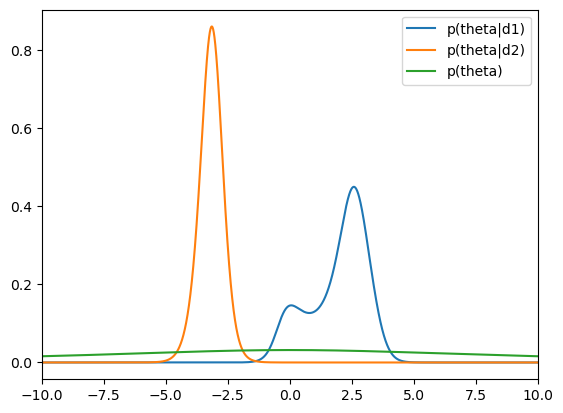

In [24]:
# probability distribution function of theta as a function
def thetaPdf(theta):
    return 1/(10*math.pi*(1+(theta/10)**2))

# calculate p(theta)
thetaPdfVals = np.zeros(len(thetaLinePoints))
for pointIdx in range(len(thetaLinePoints)):
    thetaPdfVals[pointIdx] = thetaPdf(thetaLinePoints[pointIdx])

# calculate likelihoodD1, likelihoodd2
linePoints = np.linspace(-100, 100, num = 100000)
likelihoodD1 = np.zeros(len(linePoints))
likelihoodD2 = np.zeros(len(linePoints))
for linePointIdx in range(len(linePoints)):
    likelihoodD1[linePointIdx] = likelihood(d1, linePoints[linePointIdx])
    likelihoodD2[linePointIdx] = likelihood(d2, linePoints[linePointIdx])
    
# calculate p(D) (= Sum(p(D|theta)*p(theta)))
pD1 = 0;
pD2 = 0;
for pointIdx in range(len(linePoints) - 1):
    pD1 = pD1 + (likelihoodD1[pointIdx]*thetaPdf(linePoints[pointIdx]) + likelihoodD1[pointIdx + 1]*thetaPdf(linePoints[pointIdx + 1])) * (linePoints[pointIdx + 1] - linePoints[pointIdx]) / 2
    pD2 = pD2 + (likelihoodD2[pointIdx]*thetaPdf(linePoints[pointIdx]) + likelihoodD2[pointIdx + 1]*thetaPdf(linePoints[pointIdx + 1])) * (linePoints[pointIdx + 1] - linePoints[pointIdx]) / 2
        
# calculate p(theta|d1) and p(theta|d2)
pthetaD1 = np.zeros(len(thetaLinePoints))
pthetaD2 = np.zeros(len(thetaLinePoints))
for pointIdx in range(len(pthetaD1)):
    pthetaD1[pointIdx] = math.exp(logLikelihoodD1[pointIdx]) * thetaPdf(thetaLinePoints[pointIdx])
    pthetaD2[pointIdx] = math.exp(logLikelihoodD2[pointIdx]) * thetaPdf(thetaLinePoints[pointIdx])
pthetaD1 = pthetaD1 / pD1
pthetaD2 = pthetaD2 / pD2

# plot p(theta), p(theta|d1) and p(theta|d2)
plt.plot(thetaLinePoints, pthetaD1, label = "p(theta|d1)")
plt.plot(thetaLinePoints, pthetaD2, label = "p(theta|d2)")
plt.plot(thetaLinePoints, thetaPdfVals, label = "p(theta)")
plt.xlim([-10, 10])
plt.legend(loc = 'upper right')
plt.show()

Comments: Αρχικά, για να υπολογίσουμε το p(D1) και το p(D2) χρησιμοποιήσαμε τον τύπο p(D) = Sum(p(D|θ)*p(θ)) (εννοείται ότι το άθροισμα της προαναφερθείσας σχέσης είναι στην πραγματικότητα μία προσέγγιση του αντίστοιχου ολοκληρώματος). Δεύτερον, όσον αφορά τον υπολογισμό των p(θ|D) χρησιμοποιήσαμε τον τύπο p(θ|D) = likelihoodD * p(θ) / p(D) = p(D|θ) * p(θ) / p(D). Τέλος, παρατηρούμε ότι οι συναρτήσεις p(θ|D) διαφέρουν αρκετά από την αρχική συνάρτηση p(θ). Αυτό οφείλεται στο γεγονός ότι η συνάρτηση p(θ) είναι αρκετά στοχαστική (έχει μεγαλή αβεβαιότητα/έχει μεγάλη διασπορά) και επομένως οι συναρτήσεις likelihood επηρεάζουν περισσότερο την τελική μορφή των συναρτήσεων p(θ|D) (αυτό βέβαια δεν σημαίνει πως η p(θ) δεν επηρεάζει και αυτή σε έναν βαθμό τις συναρτήσεις p(θ|D). Αν ήμασταν πιο σίγουροι για την κατανομή p(θ) τότε θα είχε μικρότερη διασπορά και επομένως θα επηρέαζε περισσότερο τις συναρτήσεις p(θ|D).

### Task_2: implement a predict function based on the bayesian estimation technic and show the results

the values of the h function for the d1 dataset are equal to:
 [0.0699, 0.0225, 0.013, 0.0723, 0.0248, 0.0471, 0.0317]
the values of the h function for the d2 dataset are equal to:
 [-0.0237, -0.0497, -0.0505, -0.0496, -0.0307]


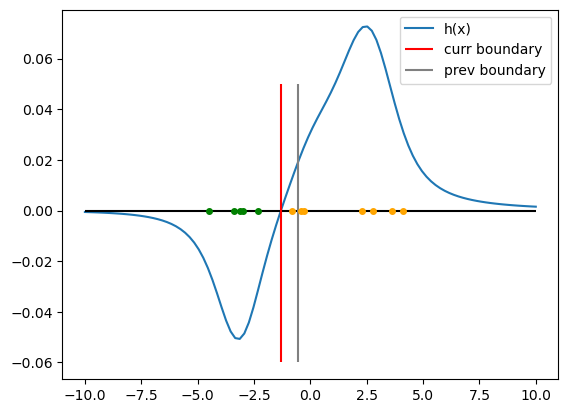

In [25]:
# discriminant function h(x) implemented as a function
def predict(dataPoint, aprioriProbabilities):
    pd1 = 0
    pd2 = 0
    for pointIdx in range(len(thetaLinePoints) - 1):
        pd1 = pd1 + (stressPdf(dataPoint, thetaLinePoints[pointIdx])*pthetaD1[pointIdx] + stressPdf(dataPoint, thetaLinePoints[pointIdx + 1])*pthetaD1[pointIdx + 1]) * (thetaLinePoints[pointIdx + 1] - thetaLinePoints[pointIdx]) / 2 
        pd2 = pd2 + (stressPdf(dataPoint, thetaLinePoints[pointIdx])*pthetaD1[pointIdx] + stressPdf(dataPoint, thetaLinePoints[pointIdx + 1])*pthetaD2[pointIdx + 1]) * (thetaLinePoints[pointIdx + 1] - thetaLinePoints[pointIdx]) / 2
    return pd1*aprioriProbabilities[0] - pd2*aprioriProbabilities[1]

# calculate h(x) values for d1 and d2 datasets and print them
d1Values = [predict(x, [7/12, 5/12]) for x in d1]
d2Values = [predict(x, [7/12, 5/12]) for x in d2]
print("the values of the h function for the d1 dataset are equal to:\n", [round(x, 4) for x in d1Values])
print("the values of the h function for the d2 dataset are equal to:\n", [round(x, 4) for x in d2Values])

# calculate h(x) and its boundary
xLinespaceH = np.linspace(-10, 10, 100)
hFunc = np.zeros(len(xLinespaceH))
for xIdx in range(len(xLinespaceH)):
    hFunc[xIdx] = predict(xLinespaceH[xIdx], [7/12, 5/12])
closestToZeroValueH = hFunc[min(range(len(hFunc)), key = lambda i: abs(hFunc[i]-0))]

# plot h(x) and its boundary (and the previous boundary (from Part 1))
plt.plot(xLinespaceH, hFunc, label = "h(x)")
plt.hlines(y = 0, xmin = -10, xmax = 10, colors = 'black')
plt.vlines(x = xLinespaceH[np.where(hFunc == closestToZeroValueH)], ymin = -0.06, ymax = 0.05, colors = 'red', label = 'curr boundary')
plt.vlines(x = xLinespaceG[np.where(gFunc == closestToZeroValue)], ymin = -0.06, ymax = 0.05, colors = 'gray', label = 'prev boundary')
for point in d1: plt.plot(point, 0, marker="o", markersize=4, markeredgecolor="orange", markerfacecolor="orange")
for point in d2: plt.plot(point, 0, marker="o", markersize=4, markeredgecolor="green", markerfacecolor="green")
plt.legend()
plt.show()

Comments: Αρχικά, όσον αφορά τη συνάρτηση διάκρισης ακολουθούμε τα εξής βήματα: h(x) = logP(x|D1) − logP(x|D2) + logP(ω1) − logP(ω2) => log(P(x|D1)*P(ω1) / P(x|D2)*P(ω2)) => e^h(x) = P(x|D1)*P(ω1) / P(x|D2)*P(ω2). Επομένως γιa h(x) > 0 => e^h(x) > 1 => P(x|D1)*P(ω1) / P(x|D2)*P(ω2) > 1 => P(x|D, ω1)*P(ω1) > P(x|D, ω2)*P(ω2) => P(ω2|D, x) > P(ω1|D, x). Άρα καταλήγουμε στο κριτήριο ταξινόμησης κατά Bayes για ελάχιστο σφάλμα. Επιπλέον, από τον τύπο P(x|D1)*P(ω1) / P(x|D2)*P(ω2) => 
S(P(x|θ)*p(θ|D)) * p(ω1) > S(P(x|θ)*p(θ|D)) * p(ω2) και με αυτόν τον τρόπο υπολογίζουμε τις τιμές της συνάρτησης h(x). Από το σχήμα παρατηρούμε ότι η συνάρτηση h ταξινομεί τα δεδομένα πολύ καλύτερα από την συνάρτηση g. Αυτό γιατί, αρχικά ταξινομεί όλα τα δεδομένα στις σωστές τους κλάσεις και κατά δεύτερον το σύνορο βρίσκεται στην διάμεσο του ευθύγραμμου τμήματος με άκρα το κοντινότερο σημείο της μίας κλάσης και το κοντινότερο σημείο της άλλης κλάσης (με αυτόν τον τρόπο τα σημεία μας είναι σωστά ταξινομημένα και ταυτόχρονα βρίσκονται όσο πιο μακριά γίνεται απο το σύνορο). Αυτή η διαφορά υποθέτω πως οφείλεται στο γεγονός ότι με την πρώτη μέθοδο (maximum likelihood) είναι πιθανόν να έγινε overfitting της συνάρτησης ταξινόμησης μάλλον γιατί τα δεδομένα δεν ήταν αρκετά αντιπροσωπευτικά των δύο κλάσεων, ενώ με την δεύτερη μέθοδο λάβαμε υπόψιν, εκτός απο την συνάρτηση likelihood, και την συνάρτηση p(θ). Με αυτόν τον τρόπο λάβαμε υπόψιν και τα δεδομένα των training sets αλλά και την πρωτύτερη γνώση που είχαμε για την παράμετρο θ και έτσι καταλήξαμε σε ένα καλύτερο αποτέλεσμα.     